In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

UVJinfo = pd.read_csv('UBVJ_MASTER_SPTCL_0546.csv')
KJzRinfo = pd.read_csv('SPTCL_0546_totalall_FOURSTARKs_photom.csv')

ID = KJzRinfo.id
k_flux = KJzRinfo.FOURSTARKs_tot
R_flux = KJzRinfo.VIMOSR
z_flux = KJzRinfo.VIMOSz
J_flux = KJzRinfo.FOURSTARJ
k_star = KJzRinfo.K_star
mask = KJzRinfo.totmask
IDUVJ = UVJinfo.PHOTID
CLUSTERZ = UVJinfo.CLUSTERZ
indivz = UVJinfo.INDIVZ
U_V = UVJinfo.U_V
V_J = UVJinfo.V_J



J_K = 2.5*np.log10(k_flux/J_flux)
z_K = 2.5*np.log10(k_flux/z_flux)
R_K = 2.5*np.log10(k_flux/R_flux)
K = -2.5*np.log10(k_flux) + 25

a = 0
JMINK = np.zeros((len(k_star),1), dtype=float)
zMINK = np.zeros((len(k_star),1), dtype=float)
RMINK = np.zeros((len(k_star),1), dtype=float)
UMINV = np.zeros((len(k_star),1), dtype=float)
VMINJ = np.zeros((len(k_star),1), dtype=float)
KMAG = np.zeros((len(k_star),1), dtype=float)
for i in range(len(k_star)):
    JMINK[a]=J_K[i]
    zMINK[a]=z_K[i]
    RMINK[a]=R_K[i]
    UMINV[a]=U_V[i]
    VMINJ[a]=V_J[i]
    KMAG[a]=K[i]
    a=a+1
    

goodJK = np.where((k_star < 0.97) & (mask ==0) & (~np.isnan(J_K[i]) == True))
goodzK = np.where((k_star < 0.97) & (mask ==0) & (~np.isnan(z_K[i]) == True))
goodRK = np.where((k_star < 0.97) & (mask ==0) & (~np.isnan(R_K[i]) == True))
goodUVJ = np.where((k_star < 0.97) & (mask ==0))

/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log10
/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log10
/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10
/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


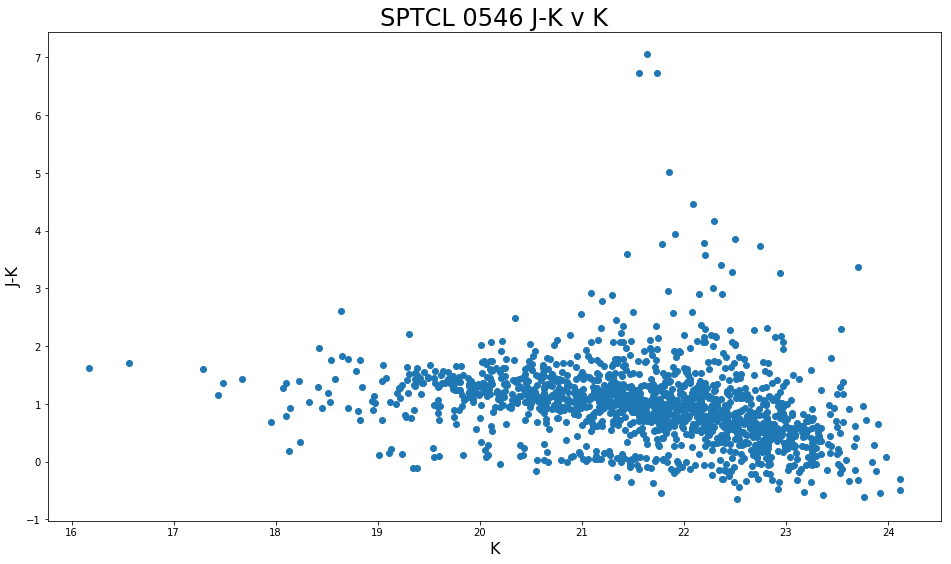

In [12]:
title = 'SPTCL 0546'
plt.figure(figsize=(16,9))
plt.plot(KMAG[goodJK], JMINK[goodJK], 'o')
plt.title(title + ' J-K v K', fontsize = 24)
plt.xlabel('K', fontsize = 16)
plt.ylabel('J-K', fontsize = 16)
plt.show()

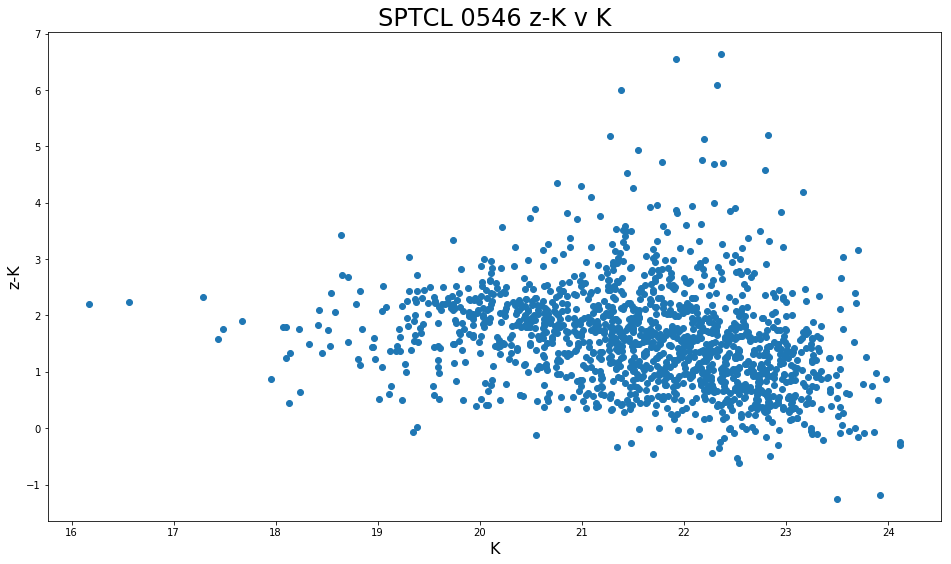

In [13]:
plt.figure(figsize=(16,9))
plt.plot(KMAG[goodzK], zMINK[goodzK], 'o')
plt.title(title + ' z-K v K', fontsize = 24)
plt.xlabel('K', fontsize = 16)
plt.ylabel('z-K', fontsize = 16)
plt.show()

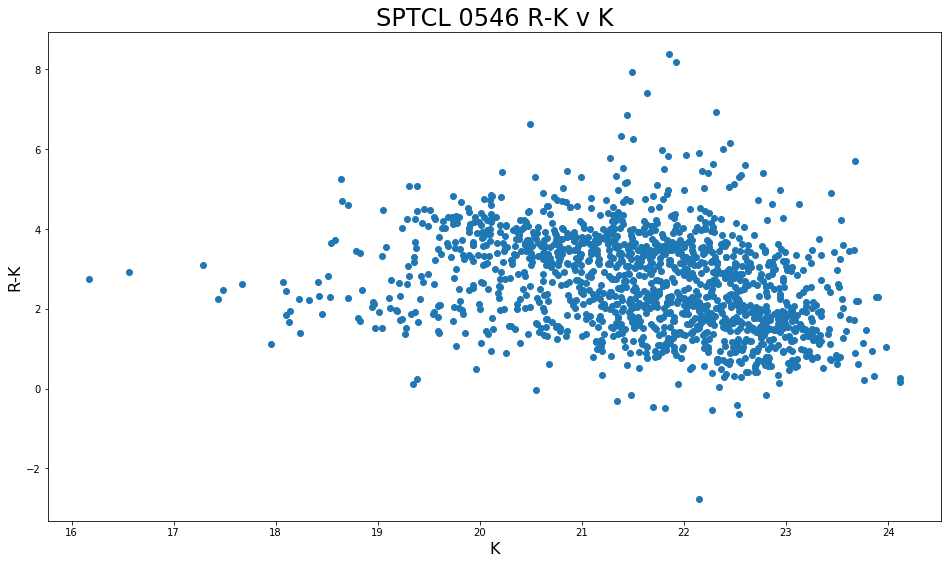

In [14]:
plt.figure(figsize=(16,9))
plt.plot(KMAG[goodRK], RMINK[goodRK], 'o')
plt.title(title + ' R-K v K', fontsize = 24)
plt.xlabel('K', fontsize = 16)
plt.ylabel('R-K', fontsize = 16)
plt.show()

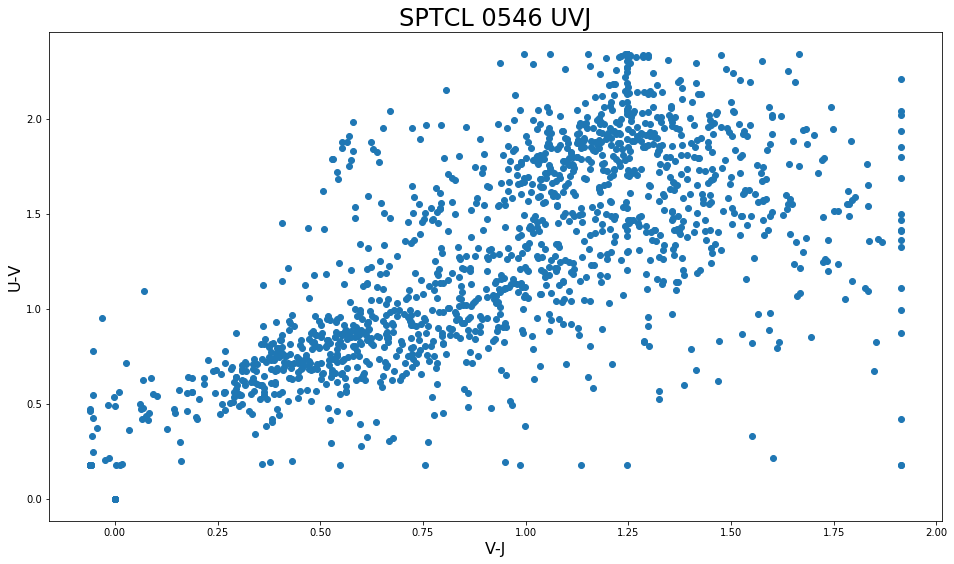

In [15]:
plt.figure(figsize=(16,9))
plt.plot(VMINJ[goodUVJ], UMINV[goodUVJ], 'o')
plt.title(title + ' UVJ', fontsize = 24)
plt.xlabel('V-J', fontsize = 16)
plt.ylabel('U-V', fontsize = 16)
plt.show()

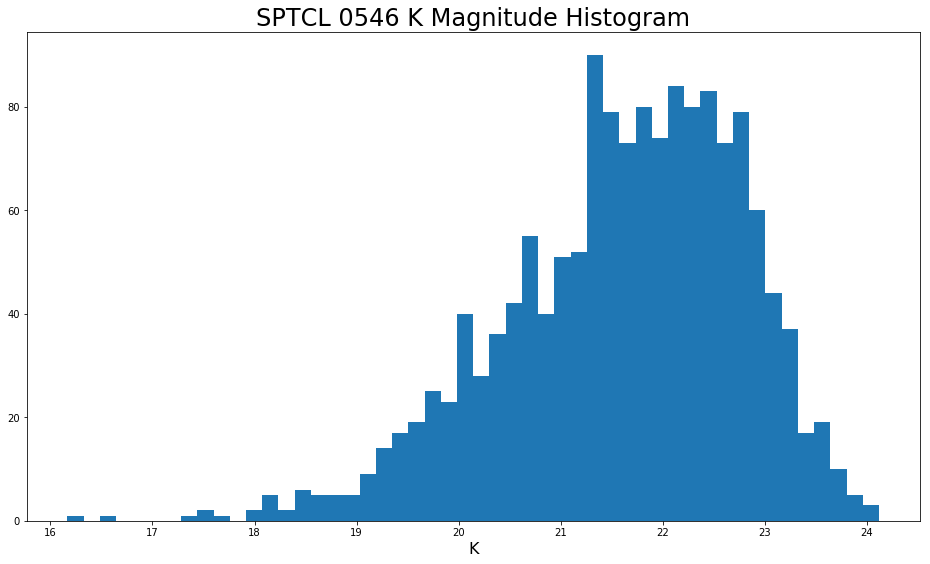

In [16]:
plt.figure(figsize=(16,9))
plt.hist(KMAG[goodUVJ], 50)
plt.title(title + ' K Magnitude Histogram', fontsize = 24)
plt.xlabel('K', fontsize = 16)
plt.show()